In [51]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
train_df=pd.read_csv('train.csv', index_col=0)
train_df.head()

,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category,Rating,Recommended
Id,,,,,,,,,
17274,34,Cute fall/holiday top,Love this top! the quality is magnificent and ...,1,General,Tops,Blouses,5,1
5921,35,NaN,NaN,0,General,Tops,Blouses,5,1
16479,40,Disappointed,"Sleeves were tight, was difficult to put on ?....",15,General,Tops,Blouses,2,0
1925,28,Gorgeous detailing,I never write reviews but this clothe is so fa...,3,General Petite,Clothes,Clothes,5,1
5691,39,Cute and comfortable tee!,Love this tshirt! casual but can be clotheed u...,0,General,Tops,Knits,5,1


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14091 entries, 17274 to 6312
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               14091 non-null  int64 
 1   Review_Title      11732 non-null  object
 2   Review            13588 non-null  object
 3   Pos_Feedback_Cnt  14091 non-null  int64 
 4   Division          14080 non-null  object
 5   Department        14080 non-null  object
 6   Product_Category  14080 non-null  object
 7   Rating            14091 non-null  int64 
 8   Recommended       14091 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [54]:
train_df.describe()

,Age,Pos_Feedback_Cnt,Rating,Recommended
count,14091.000000,14091.000000,14091.000000,14091.000000
mean,43.093677,2.465474,4.197786,0.822511
std,12.176401,5.519936,1.109792,0.382096
min,18.000000,0.000000,1.000000,0.000000
25%,34.000000,0.000000,4.000000,1.000000
50%,41.000000,1.000000,5.000000,1.000000
75%,51.000000,3.000000,5.000000,1.000000
max,94.000000,122.000000,5.000000,1.000000


In [55]:
# check null value percent
(train_df.isna().sum()/train_df.shape[0])*100

Age                  0.000000
Review_Title        16.741182
Review               3.569654
Pos_Feedback_Cnt     0.000000
Division             0.078064
Department           0.078064
Product_Category     0.078064
Rating               0.000000
Recommended          0.000000
dtype: float64

In [56]:
train_df.isna().sum()

Age                    0
Review_Title        2359
Review               503
Pos_Feedback_Cnt       0
Division              11
Department            11
Product_Category      11
Rating                 0
Recommended            0
dtype: int64

Text(0.5, 1.0, 'Age Distribution in Data')

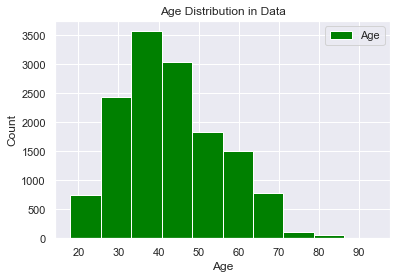

In [57]:
# The age distribution in data
plt.hist(train_df['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")

<AxesSubplot:xlabel='Rating', ylabel='Age'>

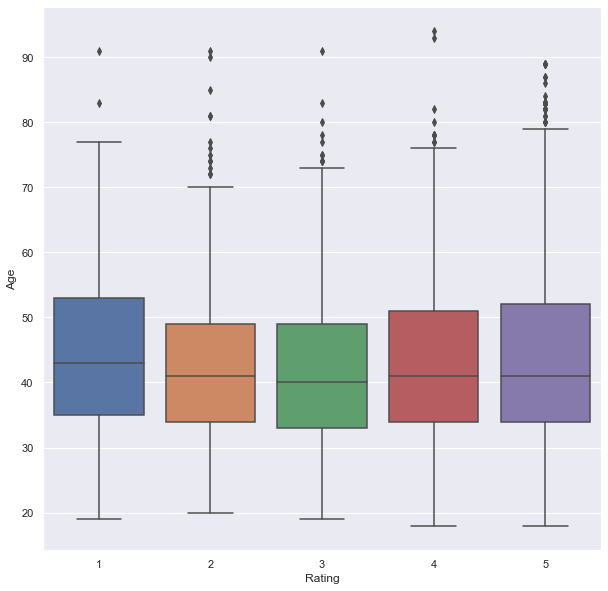

In [58]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Age', data = train_df)

c:\users\ali yusifov\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age')

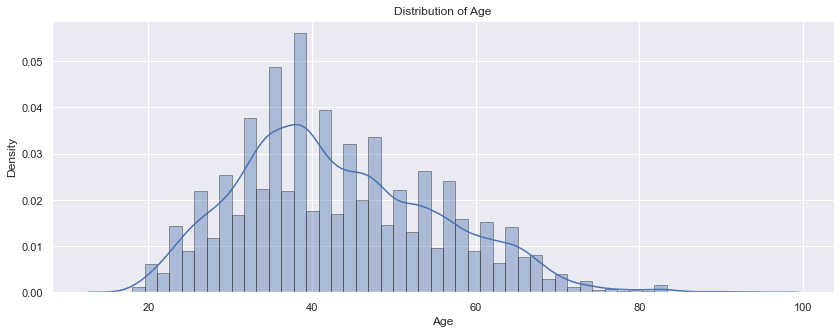

In [59]:
#age distribution
sns.set(style="darkgrid")
plt.figure(figsize= (14,5))
sns.distplot(train_df['Age'], hist_kws=dict(edgecolor="k")).set_title("Distribution of Age")

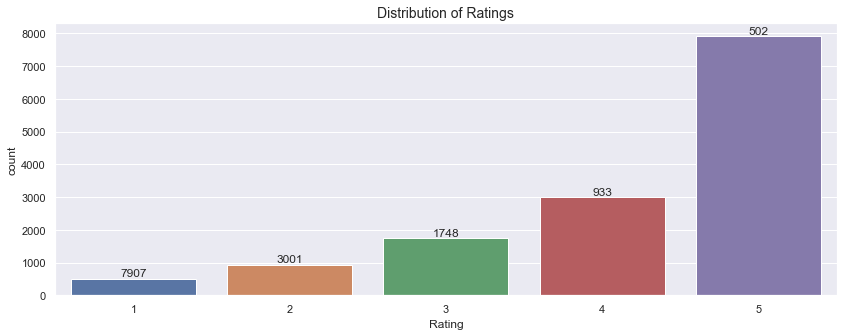

In [60]:
#rating distributions
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Rating', data=train_df)
ax.set_title("Distribution of Ratings", fontsize=14)

x=train_df['Rating'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

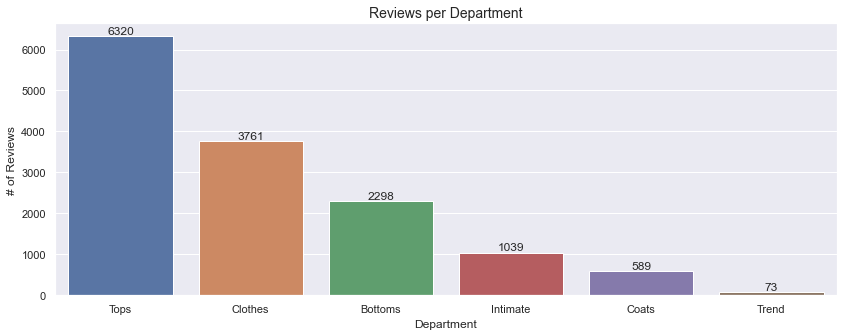

In [61]:
#reviews per department
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Department', data=train_df, order = train_df['Department'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)

x=train_df['Department'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

<AxesSubplot:xlabel='Department', ylabel='count'>

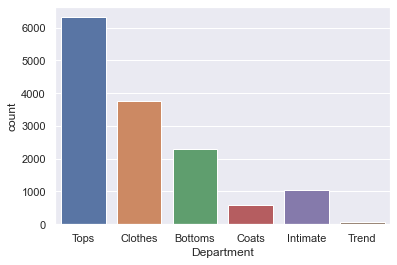

In [69]:
#plot for department categories
sns.countplot(x = 'Department', data = train_df)

<AxesSubplot:xlabel='Recommended', ylabel='count'>

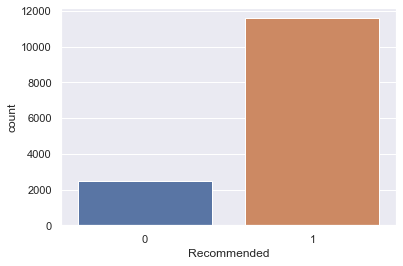

In [70]:
#plot for recommendation
sns.countplot(x = 'Recommended', data = train_df)

In [62]:
#wordclouds
import re

def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    words = letters_only.lower().split()                            
    return( " ".join( words )) 

In [63]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse'}

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


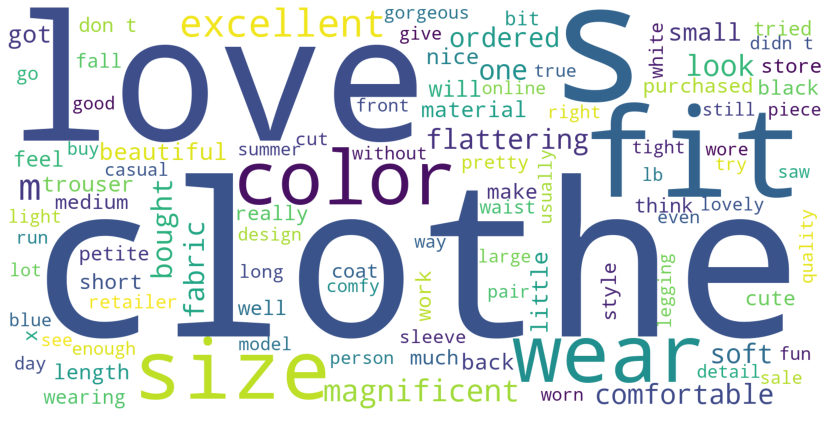

In [64]:
train_df['Review']=train_df['Review'].apply(str)
rating5= train_df[train_df['Rating']==5]['Review'].apply(clean_data)
create_cloud(rating5)

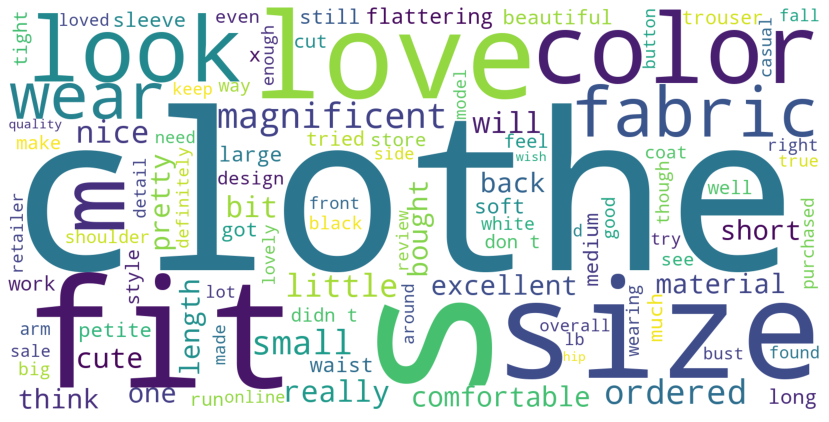

In [65]:
rating4= train_df[train_df['Rating']==4]['Review'].apply(clean_data)
create_cloud(rating4)

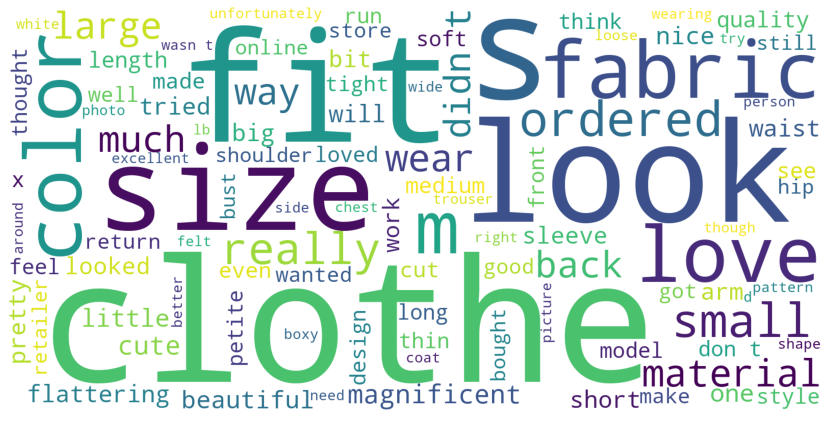

In [66]:
rating3= train_df[train_df['Rating']==3]['Review'].apply(clean_data)
create_cloud(rating3)

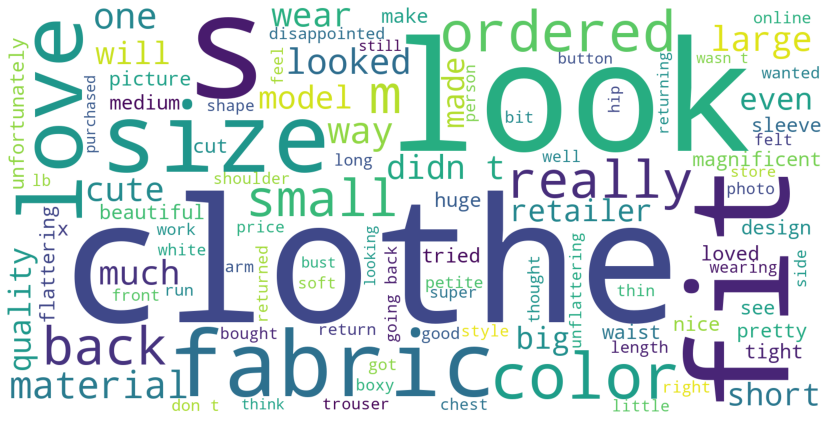

In [67]:
rating2= train_df[train_df['Rating']==2]['Review'].apply(clean_data)
create_cloud(rating2)

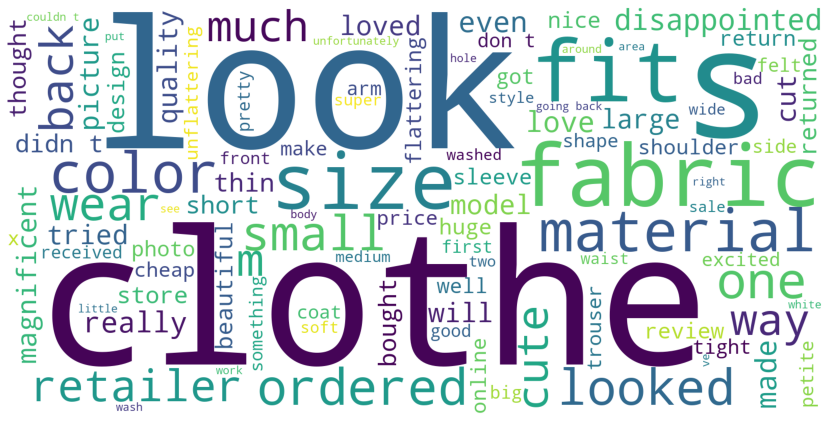

In [68]:
rating1= train_df[train_df['Rating']==1]['Review'].apply(clean_data)
create_cloud(rating1)